In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import gamma
plt.rcParams['figure.figsize'] = (12,6)

We discuss the following models

1. Poisson-Gamma: sufficient statistics, exchangability
2. Globe model: beta-binomial updating and posterior quantities
3. Normal-normal model and regularization of data
4. Priors: selection of priors and weakly regularizing priors.

As a reminder for the Bayesian paradignm, we have data $\cal{D} =\{y\}$ which are viewed as a random sample from a parameterized distribution $p(Y|\theta)$, $\theta$ could be a vector of parameters. We are interested in inferring the posterior distrubtion of $\theta$, $p(\theta | \cal{D})$. This is done by: $$p(\theta|\cal{D}) = \frac{p(\cal{D}|\theta)p(\theta)}{p(\cal{D})} = \frac{p(\cal{D}|\theta)p(\theta)}{\int p(\cal{D}|\theta)p(\theta)}d\theta$$


# Poisson Gamma Example

**Story**: The data consists of 155 women who were 40 years old. We are interested in the birth rate of women with a college degree and women without. We are told that 111 women without college degrees have 217 children, while 44 women with college degrees have 66 children.

**Modeling**: Let $Y_{1,1}, \ldots Y_{n_1, 1}$ be the number of children for $n_1$ women without college degrees, and $Y_{1,2}, \ldots Y_{n_2, 2}$ for $n_2$ women with college degrees.

We assume that each class of women (degree vs. non-degree) has a different birth rate $\theta_1$ and $\theta_2$

We use Poisson distribution to model the number of children a woman has during her lifetime: $$Y_{i,1} \sim Poisson(\theta_1), Y_{i,2} \sim Poisson(\theta_2)$$ 

We have the likelihood within each class is.
$$p(Y_{1,1}, \ldots Y_{n_1, 1} \mid \theta_1) = \prod_{i=1}^{n_1}p(Y_{i,1}\mid \theta_1) = Poisson(n_1\theta_1)$$ and $$p(Y_{1,2}, \ldots Y_{n_2, } \mid \theta_2) = \prod_{i=1}^{n_2}p(Y_{i,2}\mid \theta_2) = Poisson(n_2\theta_2)$$

We will use conjugate prior $Gamma(\theta, a, b) $for $\theta$ for easy computation: $$p(\theta) = Gamma(\theta, a,b) = \frac{b^a}{\Gamma(a)}\theta^{a-1}e^{-b\theta},$$ where a is the shape parameter and b is the inverse scale.

Note that in scipy.stats.gamma is parameterized using the scale instead. So if we want to specifiy Gamma(a,b) we should supply scale = 1/b

This will leads to the posterior distribution of $\theta$ is: $$\theta \mid, Y_1, \dots ,Y_n \sim Gamma(\theta, a + \sum Y_i, b + n)$$

In other words, b controls the total number of mums and a the kids.

So if we choose the prior of $\theta$ as Gamma(a=2,b=1), we believe on avarage 1 mum has two kids (recall $\theta = a/b$

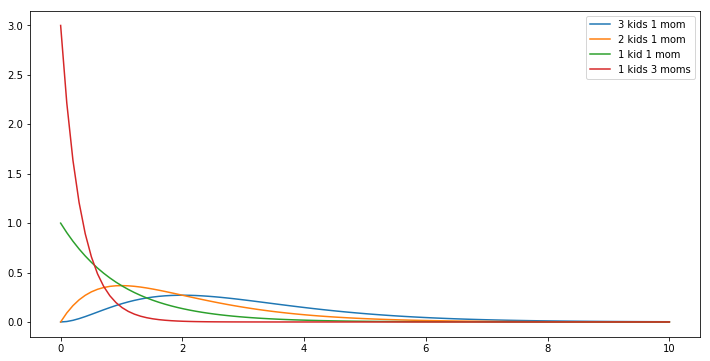

In [28]:
xxx=np.linspace(0,10,100)
plt.plot(xxx, gamma.pdf(xxx, 3, scale=1), label="3 kids 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 2, scale=1), label="2 kids 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 1, scale=1), label="1 kid 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 1, scale=1/3), label="1 kids 3 moms");
plt.legend();


**Our posterior**:

$$p(\theta_1 \mid n_1=111, \sum_{i=1}^{n_1} Y_{i,1} = 217) = Gamma(\theta_1, 2 + 217, 1 + 111)$$


$$p(\theta_2 \mid n_2=44, \sum_{i=1}^{n_2} Y_{i,2} = 66) = Gamma(\theta_1, 2 + 66, 1 + 44)$$




The mean of the two postior is not sensitive to our prior as we expect:

In [29]:
219/112, 68/45


(1.9553571428571428, 1.511111111111111)

We can calculate and plot the posterior predictives. We do that for the two rates. We also shows the lack of sensitivity by considering a strange prior a = 20, b =2. That is 20 kids for 2 mums!

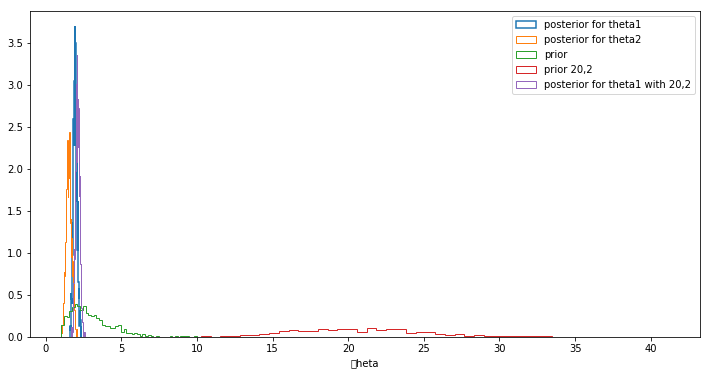

In [30]:
from scipy.stats import gamma
a = 2 # Gamma prior, a,b values 
b = 1 

n1 = 111
sy1 = 217  # sum of y1
n2 = 44 
sy2=66     #sum of y2
N=1000


# ACTUAL VALUES 
# posterior mean 
(a+sy1)/(b+n1) 
(a+sy2)/(b+n2)

# EXACT POSTERIORS


theta1=gamma.rvs(a+sy1, scale=1.0/( b+n1), size=N)
q=plt.hist(theta1, 50,linewidth=1.5,normed=True, histtype='step',   label=u'posterior for theta1')
theta2 = gamma.rvs(a+sy2,scale= 1./(b+n2), size=N)
q=plt.hist(theta2, 50, linewidth=1,histtype='step', alpha=1.0,normed=True,   label=u'posterior for theta2') 



th_prior = gamma.rvs(2.0, 1.0, size=N);
plt.hist(th_prior, 50,linewidth=1, histtype='step',alpha=1.0, normed=True,   label=u'prior') 

#just for theta1, try a wierd pri
th_priorwierd = gamma.rvs(20.0, 1.0, size=N);
theta1wierd=gamma.rvs(20+sy1, scale=1.0/( 2+n1), size=N)
plt.hist(th_priorwierd, 50,linewidth=1, histtype='step',alpha=1.0, normed=True,   label=u'prior 20,2') 
plt.hist(theta1wierd, 50, linewidth=1,histtype='step', alpha=1.0,normed=True,   label=u'posterior for theta1 with 20,2') 


# plt.xlim( [0,8])
plt.xlabel('\theta')
plt.legend()


**Inference** Are there any difference between birth rates of two groups of women.

In [31]:
np.mean(theta1 - theta2)

0.4417325646475606

**Posterior predictive distribution** What is the distribution of the number of children of a woman. That is we want to compute $$p(y^*|D) = \int p(y^*|\theta)p(\theta)d\theta$$

In [32]:
from scipy.stats import poisson
postpred1 = poisson.rvs(theta1)
postpred2 = poisson.rvs(theta2)

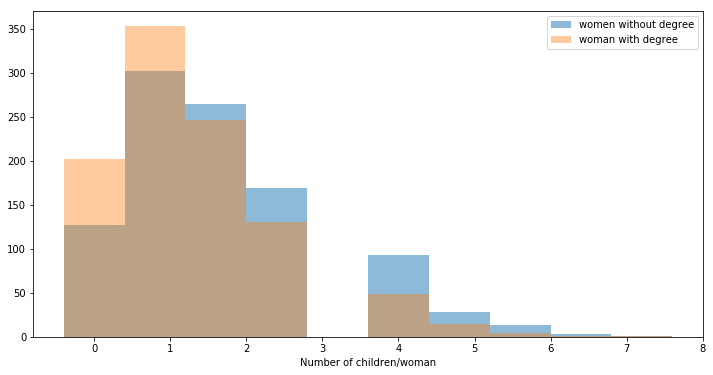

In [33]:
plt.hist(postpred1, alpha=0.5, align="left", label='women without degree');
plt.hist(postpred2, alpha=0.4, align="left", label='woman with degree');
plt.xlabel('Number of children/woman')
plt.legend()

We can see that woman with degree tends to have less children than woman without degree.

We care about posterior predictive distribution because it allows us to double check our model.
1. make predictions
2. model checking: is the model valid.

# Normal model

**Problem**: Suppose we want to infer the mean parameter, $\mu$ of a normal distribution $\cal{N}(\mu, \sigma^2)$, where $\sigma^2$ is assumed to be fixed using a given data set $\cal{D} = {y_1, \dots, y_n}$.

We assume that given a fixed $\sigma^2$, the mean $\mu \sim \cal{N}(\mu_0, \tau_o^2)$

It is a well established result that the posterior distribution of $\mu$ is $$p(\mu \mid \cal{D}, \sigma^2) = \cal{N}(\mu_n, \tau_n^2),$$ where $$\mu_n = \frac{\frac{n}{\sigma^2}\bar{y} + \frac{1}{\tau_0^2}\mu_0}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}},$$ and $$\frac{1}{\tau_n^2} = \frac{1}{\tau_0^2} + \frac{1}{\sigma^2}$$

We demostrate by code as follows.

In [34]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)
n = len(Y)
print("sigma", sig, "mu", mu_data, "n", n)

sigma 1.3309237486390264 mu 18.144444444444446 n 9


In [35]:
# Prior mean
mu_prior = 19.5
# prior std
tau = 10 

In [36]:
kappa = sig**2 / tau**2
sig_post =np.sqrt(1./( 1./tau**2 + n/sig**2));
# posterior mean
mu_post = kappa / (kappa + n) *mu_prior + n/(kappa+n)* mu_data
print("mu post", mu_post, "sig_post", sig_post)

mu post 18.147107175068875 sig_post 0.4432053110061127


In [37]:
#samples
N = 15000
theta_prior = np.random.normal(loc=mu_prior, scale=tau, size=N);
theta_post = np.random.normal(loc=mu_post, scale=sig_post, size=N);

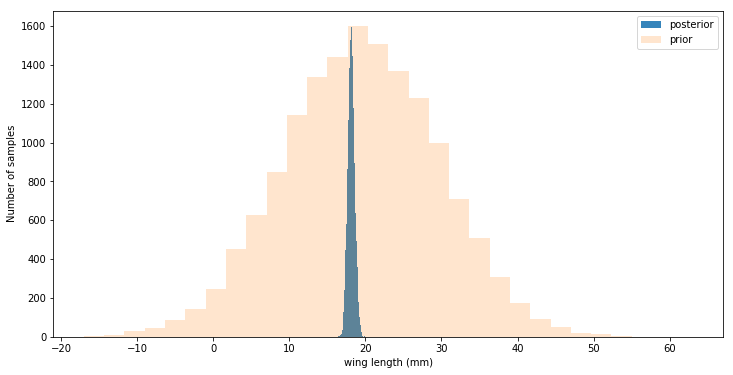

In [38]:
plt.hist(theta_post, bins=30, alpha=0.9, label="posterior");
plt.hist(theta_prior, bins=30, alpha=0.2, label="prior");
#plt.xlim([10, 30])
plt.xlabel("wing length (mm)")
plt.ylabel("Number of samples")
plt.legend();